We work with Customer Personality Analysis: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?resource=download

In [45]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
%matplotlib inline

# Preprocessing data

Let's import our data and take a look at it:

In [2]:
df = pd.read_csv(os.getcwd() + "\\marketing_campaign.csv")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.shape

(2240, 29)

There is information about 2240 people and 29 different parameters

In [4]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [5]:
df.dropna(inplace = True)

Calculating the age by the year of birth:

In [6]:
df["Year_Birth"] = 2022 - df["Year_Birth"]
df.rename(columns = {'Year_Birth': 'Age'}, inplace = True)

Combining all amount spent during 2 years:

In [7]:
df["Spent"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]

'Dt_Customer', which stands for date of customer's enrollment with the company, seems to complicate our data. Let's leave it out:

In [8]:
df.drop("Dt_Customer", axis=1, inplace=True)

Let's also leave out empty and unneccessary data:

In [9]:
df.drop(['Z_CostContact','Z_Revenue', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',\
    'AcceptedCmp4','AcceptedCmp5', 'Complain', 'Response'], axis = 1, inplace = True)

In [10]:
df.drop("ID", axis=1, inplace=True)
df

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Spent
0,65,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,1617
1,68,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,27
2,57,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,776
3,38,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,53
4,41,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,55,Graduation,Married,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,1341
2236,76,PhD,Together,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,444
2237,41,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,1241
2238,66,Master,Together,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,843


In [11]:
df.describe()

,Age,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Spent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,53.179603,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,607.075361
std,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,602.900476
min,26.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,45.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,69.000000
50%,52.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,396.500000
75%,63.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,1048.000000
max,129.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,2525.000000


Next, we need to binarize the remaining non-numeric variables:

In [12]:
X = pd.get_dummies(df)
X.head()

,Age,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,65,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,0,0,0,1,0,0,0
1,68,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,0,0,0,1,0,0,0
2,57,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,0,0,0,0,1,0,0
3,38,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,0,0,0,0,1,0,0
4,41,58293.0,1,0,94,173,43,118,46,27,...,0,1,0,0,0,1,0,0,0,0


In [13]:
X.shape

(2216, 30)

In [14]:
X.iloc[5]

Age                           55.0
Income                     62513.0
Kidhome                        0.0
Teenhome                       1.0
Recency                       16.0
MntWines                     520.0
MntFruits                     42.0
MntMeatProducts               98.0
MntFishProducts                0.0
MntSweetProducts              42.0
MntGoldProds                  14.0
NumDealsPurchases              2.0
NumWebPurchases                6.0
NumCatalogPurchases            4.0
NumStorePurchases             10.0
NumWebVisitsMonth              6.0
Spent                        716.0
Education_2n Cycle             0.0
Education_Basic                0.0
Education_Graduation           0.0
Education_Master               1.0
Education_PhD                  0.0
Marital_Status_Absurd          0.0
Marital_Status_Alone           0.0
Marital_Status_Divorced        0.0
Marital_Status_Married         0.0
Marital_Status_Single          0.0
Marital_Status_Together        1.0
Marital_Status_Widow

Now, we shall visualize our results using attribute distribution hystograms and their pair-wise plots.

In [15]:
def pairplot(X, y=None, colors=None):
    fig, axes = plt.subplots(nrows=X.shape[1], ncols=X.shape[1], figsize=(15,15))

    if y is None:
        y = np.array([0]*X.shape[0])
    unique_y, col_idx = np.unique(y, return_inverse=True)
    if colors is None:
        colors = ['blue']
    colors = np.array(colors)
    for i in range(X.shape[1]):
        for j in range(X.shape[1]):
            if i == j:
                for k, v in enumerate(unique_y):
                    axes[i, j].hist(X.iloc[y == v, i].values, 15, color=colors[k], alpha=0.5)
            else:
                axes[i, j].scatter(X.iloc[:, i].values, X.iloc[:, j].values, c=colors[col_idx], s=8)
            if i == X.shape[1] - 1:
                axes[i, j].set_xlabel(X.columns[j])
            if j == 0:
                axes[i, j].set_ylabel(X.columns[i])
            axes[i, j].set_xticks([])
            axes[i, j].set_yticks([])

And computing frequency of unique attribute values in each cluster.

In [16]:
def value_counts(X, y=None):
    for c in X.columns:
        print("---- %s ---" % c)
        if y is None:
            print(X[c].value_counts())
        else:
            print(pd.pivot_table(pd.DataFrame({c: X[c].values, 'cluster': y}), index=[c], columns=['cluster'], aggfunc=len))

In [17]:
X.columns

Index(['Age', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Spent', 'Education_2n Cycle', 'Education_Basic',
       'Education_Graduation', 'Education_Master', 'Education_PhD',
       'Marital_Status_Absurd', 'Marital_Status_Alone',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Marital_Status_YOLO'],
      dtype='object')

Sorting out quantitative and categorical attributes:

In [18]:
cat_features = ["Education", "Marital_Status"]
num_features = [c for c in df.columns if not(c in cat_features)]

In [19]:
num_features

['Age',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Spent']

Let's take a look at data distribution:

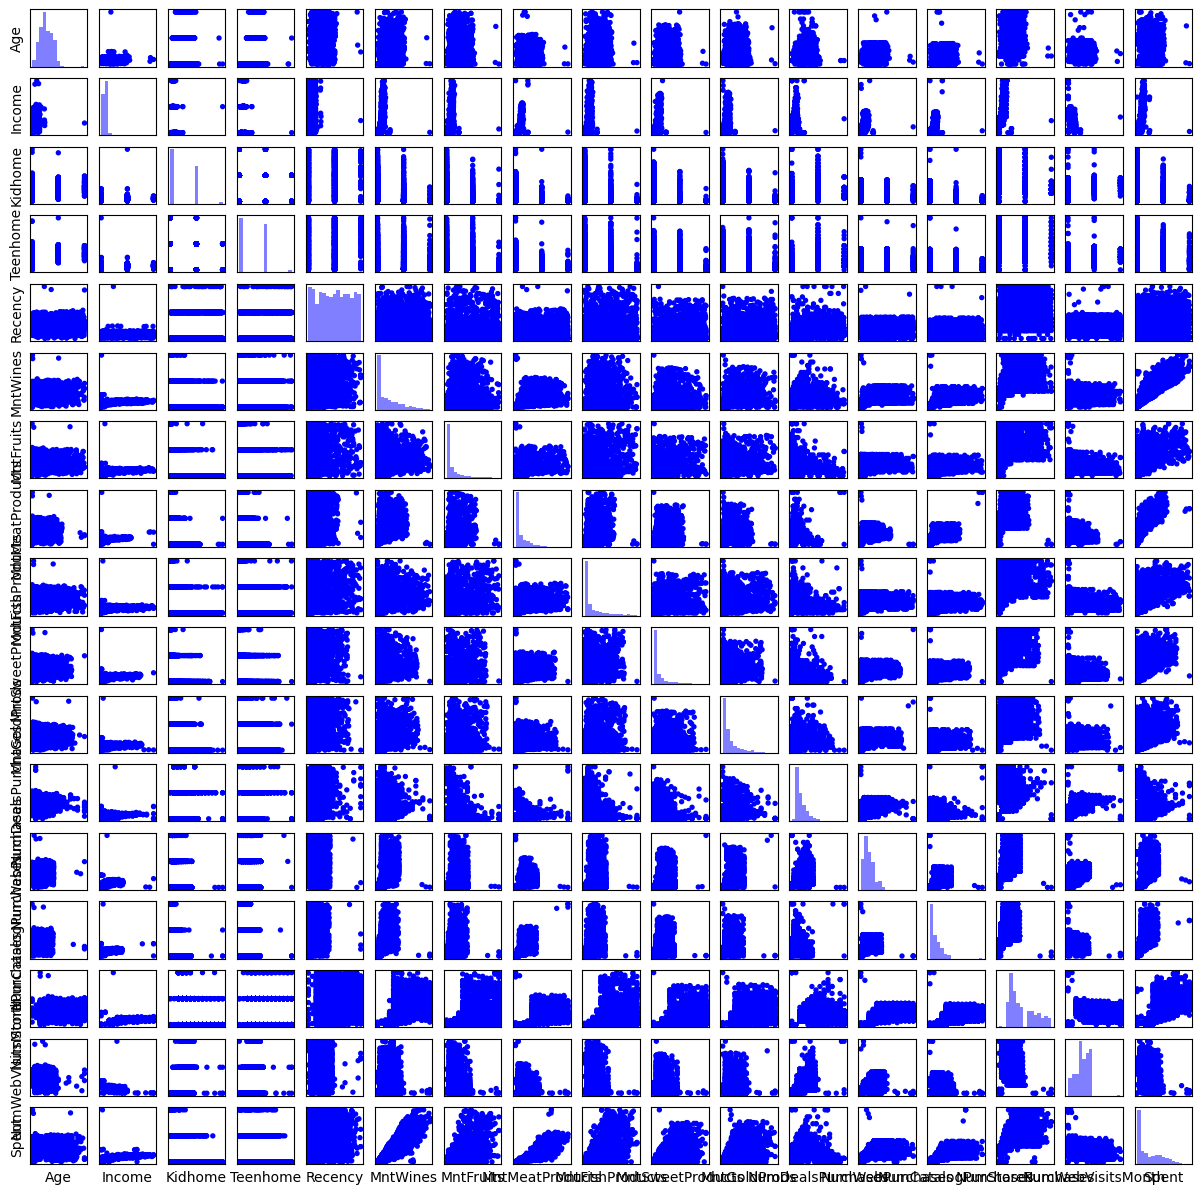

In [20]:
pairplot(df[num_features])

In [21]:
value_counts(df[cat_features])

---- Education ---
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64
---- Marital_Status ---
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


In [25]:
df.dtypes

Age                      int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Spent                    int64
dtype: object

In [27]:
X.dtypes

Age                          int64
Income                     float64
Kidhome                      int64
Teenhome                     int64
Recency                      int64
MntWines                     int64
MntFruits                    int64
MntMeatProducts              int64
MntFishProducts              int64
MntSweetProducts             int64
MntGoldProds                 int64
NumDealsPurchases            int64
NumWebPurchases              int64
NumCatalogPurchases          int64
NumStorePurchases            int64
NumWebVisitsMonth            int64
Spent                        int64
Education_2n Cycle           uint8
Education_Basic              uint8
Education_Graduation         uint8
Education_Master             uint8
Education_PhD                uint8
Marital_Status_Absurd        uint8
Marital_Status_Alone         uint8
Marital_Status_Divorced      uint8
Marital_Status_Married       uint8
Marital_Status_Single        uint8
Marital_Status_Together      uint8
Marital_Status_Widow

In [30]:
scaler = StandardScaler()
scaler.fit(X)
scaled_features = pd.DataFrame(scaler.transform(X), columns = X.columns)

In [31]:
scaled_features.head()

,Age,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,0.986443,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,...,-0.444062,-0.526530,-0.030056,-0.036819,-0.341958,-0.794110,1.924807,-0.590553,-0.188452,-0.030056
1,1.236801,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,...,-0.444062,-0.526530,-0.030056,-0.036819,-0.341958,-0.794110,1.924807,-0.590553,-0.188452,-0.030056
2,0.318822,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,...,-0.444062,-0.526530,-0.030056,-0.036819,-0.341958,-0.794110,-0.519533,1.693329,-0.188452,-0.030056
3,-1.266777,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,...,-0.444062,-0.526530,-0.030056,-0.036819,-0.341958,-0.794110,-0.519533,1.693329,-0.188452,-0.030056
4,-1.016420,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,...,-0.444062,1.899228,-0.030056,-0.036819,-0.341958,1.259271,-0.519533,-0.590553,-0.188452,-0.030056


In [32]:
scaled_features.shape

(2216, 30)

Reducing dimesionality using principal component analysis (PCA):

In [33]:
pca = PCA(n_components = 3)
pca.fit(scaled_features)
PCA_df = pd.DataFrame(pca.transform(scaled_features), columns=(["Education","Income", "Kidhome"]))
PCA_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Education,2216.0,-1.090183e-16,2.647971,-5.097238,-2.469242,-0.668164,2.290509,7.072306
Income,2216.0,9.619261e-18,1.466373,-4.023574,-1.141505,-0.126263,1.010585,4.855707
Kidhome,2216.0,8.336693e-17,1.292359,-2.905825,-1.159984,0.165835,1.017502,3.959084


Visualizing data:

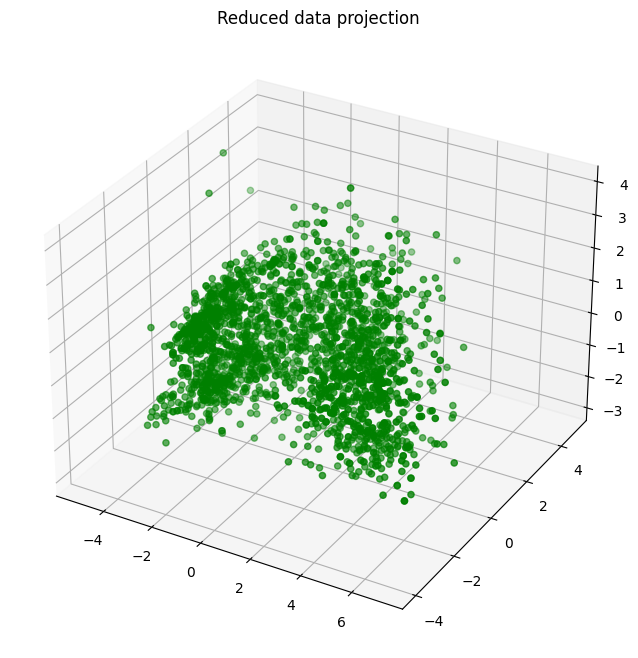

In [34]:
x = PCA_df["Education"]
y = PCA_df["Income"]
z = PCA_df["Kidhome"]

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(x, y, z, c="green", marker="o" )
ax.set_title("Reduced data projection")
plt.show()

# Clustering with KMeans

First, let's determine the optimal number of clusters:

In [35]:
params = np.arange(2, 30)

In [40]:
j = []
for k in params:
    kmns = KMeans(n_clusters = k, random_state = 8, n_init = 4, max_iter = 1000)
    kmns.fit(PCA_df)
    j.append(kmns.inertia_)
j = np.array(j)

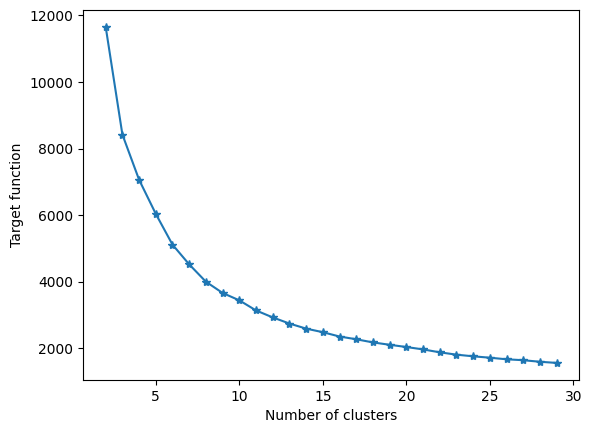

In [41]:
plt.plot(params, j, "-*")
plt.xlabel("Number of clusters")
plt.ylabel("Target function")
plt.show()

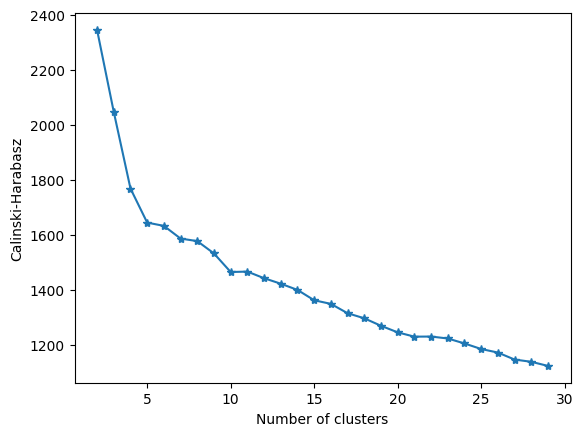

In [42]:
j = []
for k in params:
    kmns = KMeans(n_clusters = k, random_state = 8, n_init = 4, max_iter = 1000)
    kmns.fit(PCA_df)
    j.append(calinski_harabasz_score(PCA_df, kmns.labels_))
j = np.array(j)
plt.plot(params, j, "-*")
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz')
plt.show()
     

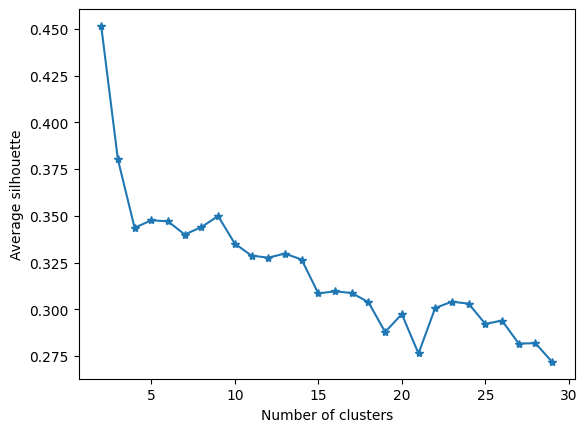

In [43]:
j = []
for k in params:
    kmns = KMeans(n_clusters = k, random_state = 8, n_init = 4, max_iter = 1000)
    kmns.fit(PCA_df)
    j.append(silhouette_score(PCA_df, kmns.labels_))
j = np.array(j)
plt.plot(params, j, "-*")
plt.xlabel('Number of clusters')
plt.ylabel('Average silhouette')
plt.show()

Looks like the optimal number of clusters is 4

In [44]:
kmns = KMeans(n_clusters = 4, random_state = 8, n_init = 4, max_iter = 1000)
y_pred = kmns.fit_predict(PCA_df)

In [46]:
def metrics(X, y_pred):
    print("Calinski-Harabasz: %.4f" % calinski_harabasz_score(X, y_pred))

    silhouette_avg = silhouette_score(X, y_pred)
    print("Average silhouette: %.4f" % silhouette_avg)

    n_clusters = len(np.unique(y_pred))

    # Show how silhouettes are changed in each cluster
    fig, ax1 = plt.subplots(figsize=(8,6))
    ax1.set_xlim([-0.1, 1])
    # 10 is needed for indentation
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    sample_silhouette_values = silhouette_samples(X, y_pred)

    y_lower = 10
    # iterate over all the clusters
    for i in range(n_clusters):
        # Aggregate and sort silhouettes of objects in the cluster i
        ith_cluster_silhouette_values = \
            sample_silhouette_values[y_pred == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.get_cmap("nipy_spectral")(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Print the number of the cluster
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute a new lower boundary between cluster silhouettes 
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Silhouettes of different clusters")
    ax1.set_xlabel("Silhouette value")
    ax1.set_ylabel("Cluster number")

    # Vertical line shows average value of silhouette
    ax1.axvline(x=silhouette_avg, color="red", linestyle="-.")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

Calinski-Harabasz: 1767.9512
Average silhouette: 0.3436


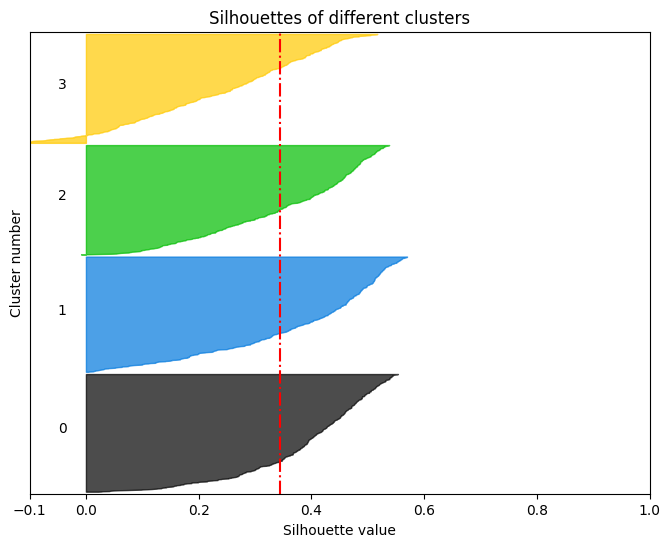

In [48]:
metrics(PCA_df, y_pred)